<a href="https://colab.research.google.com/github/whatsgoodg/ML-DL-basics/blob/main/1_3_data_preprocessing(splitting_%26_scaling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 전처리를 위한 도미와 빙어 데이터     
* 도미 35
* 빙어 14      
      
feature      
* 길이
* 무게

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

(49, 2)의 형태로 데이터 셋을 만들어 줌       
**2차원 리스트**

In [ ]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

분류를 위한 target      
**`np.concatenate()`** 함수는 일차원 배열 두 개를 하나로 이어줌

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

scikit-learn을 이용해 훈련 셋과 데이터 셋 나누기        
deafault: 25% test, 75% train
random_state: random seed for random selection

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

임의 추출을 했지만 **sampling bias**가 일어났으므로             
train_test_split의 매개변수 **stratify** 수정             
<u>전체 데이터의 target을 인자로 주면 전체 데이터의 샘플 비율로 나누어줌</u>          

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

기존의 모델 다시 학습 후 하나의 샘플 에측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

(25, 150)의 특성을 가진 도미를예측      

In [ ]:
kn.predict([[25, 150]])

array([0.])

잘못된 예측이므로              
가장 가까운 거리의 샘플들과의 거리와 인덱스 반환
**`kn.kneigbors([25, 150])`**

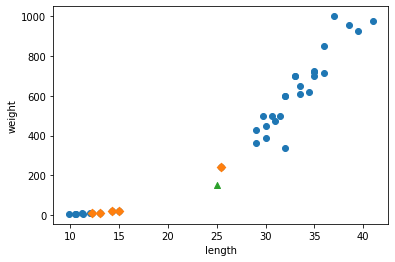

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

y축의 scale이 문제,            
단위가 큰 탓에 가까운 length의 계산은 미미함.           
length의 scale을 weight과 맞춰봄 

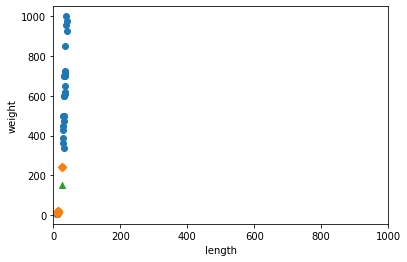

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

length는 애초에 작은 값이라 이래도 이전과 상황이 같음.         
y축의 scale을 바꿔줘야 함       
널리 사용되는 **`표준점수`**를 이용해 바꿔줌       
<u>각 특성값이 평균에서 표준편차의 몇 배만큼 떨어진지를 나타냄</u>           
거리의 영향을 많이 받으므로 이러한 작업이 필요. 

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

scaling된 train 셋

In [ ]:
train_scaled = (train_input - mean) / std

샘플들도 이러한 과정을 거쳐야 함              
기존의 산점도와 거의 비슷, 그러나 scale이 달라져 있음.        
그렇다면 눈대중의 거리와 실제 거리가 비슷할 것임.             

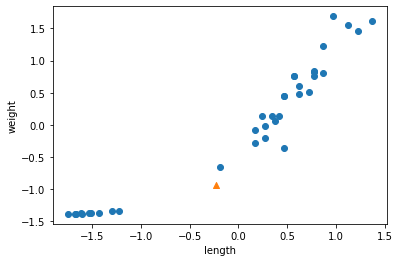

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

이 데이터로 학습

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

test 데이터 셋 scaling 후, 정확도와 이전 sample값 예측값 확인

In [ ]:
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))
kn.predict([new])

1.0


array([1.])

산점도 확인인

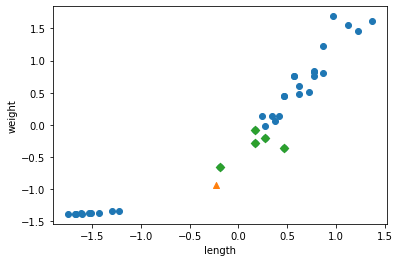

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()